<a href="https://colab.research.google.com/github/jennifervalerianieto-collab/Estadistica2025/blob/main/Proyecto_u1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
Tab= pd.read_csv("https://raw.githubusercontent.com/jennifervalerianieto-collab/Estadistica2025/refs/heads/main/insurance.csv")
Tab

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
Tab["sex"]= Tab["sex"].map({"female":2, "male":1})

In [ ]:
Tab["smoker"]= Tab["smoker"].map({"yes":1 ,"no":0})

In [ ]:
Tab["region"]= Tab["region"].map({"northeast":4, "northwest":3, "southwest" :2, "southeast":1, })

In [ ]:
Tab

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'bmi'),
  Text(0, 3.5, 'children'),
  Text(0, 4.5, 'smoker'),
  Text(0, 5.5, 'region'),
  Text(0, 6.5, 'charges')])

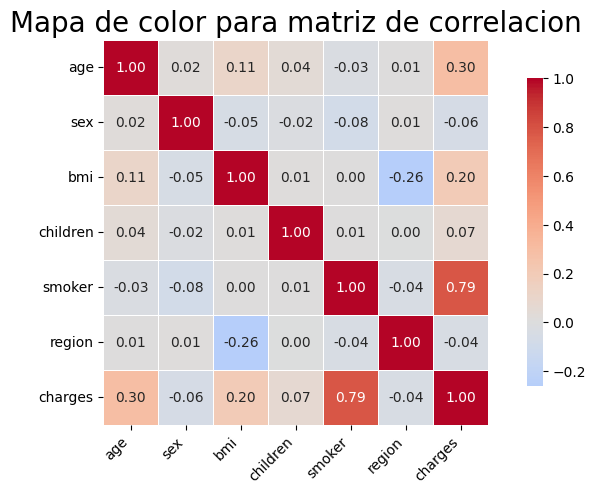

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion= Tab.corr()

plt.figure(figsize=(10,5), dpi= 100)

sns.heatmap(
    matriz_de_correlacion,
    annot= True,
    fmt= "0.2f",
    cmap= "coolwarm",
    square= True,
    linewidths= 0.5,
    cbar_kws= {"shrink":0.8},
    center= 0,
    )

plt.title("Mapa de color para matriz de correlacion", fontsize=20)
plt.xticks(rotation= 45, ha= "right")
plt.yticks(rotation= 0)


 coeficiente de correlacion (scipy) PearsonRResult(statistic=np.float64(0.29900819333064754), pvalue=np.float64(4.886693331718529e-29))
parametros: const    3165.885006
age       257.722619
dtype: float64


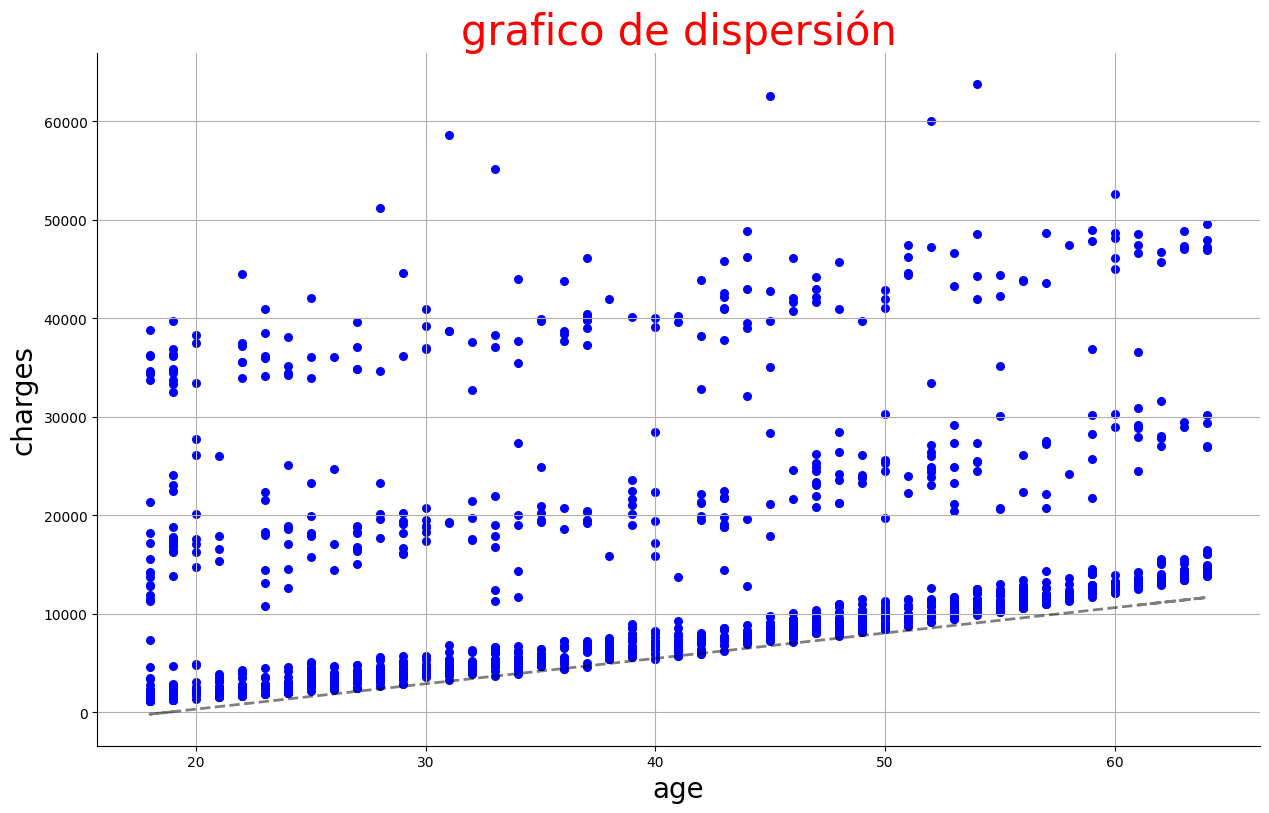


 coeficiente de determinación= 0.0894

 intervalo de confianza                  0            1
const  1327.440272  5004.329740
age     213.578754   301.866483
213.578754< beta < 301.866483
Como es diferente a 0, entonces si hay correlacion lineal


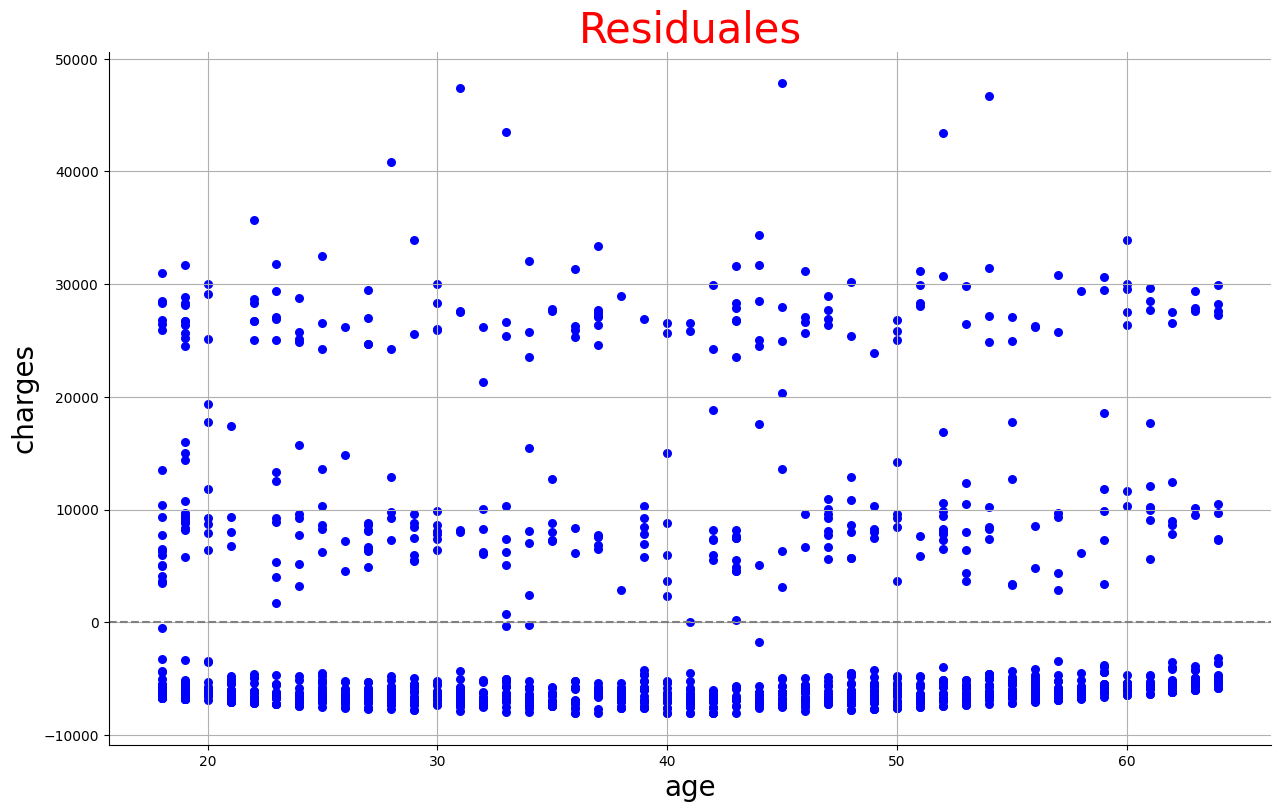


 valor-p (shapiro) 1.2340665202736424e-45
se rechaza la H0: no hay normalidad
valor_p de Breusch-Pagan:  0.9838

x=20, [8320.3373794]
el 8320.3373794 - 8000 es el correspondiente al gasto los 20 años
x=40, [13474.78975274]
el 13474.78975274 - 8000 es el correspondiente al gasto a los 40 años
              df        sum_sq       mean_sq           F        PR(>F)
age          1.0  1.753019e+10  1.753019e+10  131.174013  4.886693e-29
Residual  1336.0  1.785440e+11  1.336407e+08         NaN           NaN
entonces se rechaza la H0 y H1 diferente 0 se aprueba


In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jennifervalerianieto-collab/Estadistica2025/refs/heads/main/insurance.csv")
x=df["age"]
y=df["charges"]

import matplotlib.pyplot as plt
plt.figure(figsize=(15,9), dpi=100)
plt.scatter(x , y, label="charges", color="blue", s=30)
plt.xlabel("age", fontsize=20)
plt.ylabel("charges", fontsize=20)
plt.title("grafico de dispersión",  fontsize=30, color="red")
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()

from scipy.stats import pearsonr
print("\n coeficiente de correlacion (scipy)",pearsonr(x,y))

import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
modelo.params
print("parametros:",modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x,yc-8000, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()


from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\n coeficiente de determinación=",round(r2,4))


intervalo_de_confianza= modelo.conf_int(alpha=0.05)
print("\n intervalo de confianza",intervalo_de_confianza)
print("213.578754< beta < 301.866483")
print("Como es diferente a 0, entonces si hay correlacion lineal")

residuales=modelo.resid
plt.figure(figsize=(15,9),dpi=100)
plt.scatter( x ,residuales, label="residuales", color="blue", s=30)
plt.xlabel("age", fontsize=20)
plt.ylabel("charges", fontsize=20)
plt.title("Residuales",  fontsize=30, color="red")
plt.gca().spines[["top","right"]]. set_visible(False)
plt.grid()
plt.axhline(y=0, color="grey", linestyle="--")
plt.show()


from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro =shapiro(residuales)
print("\n valor-p (shapiro)",valor_p_shapiro)
print("se rechaza la H0: no hay normalidad")

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
print("x=20,",modelo.predict([1,20]))
print("el 8320.3373794 - 8000 es el correspondiente al gasto los 20 años")
print("x=40,",modelo.predict([1,40]))
print("el 13474.78975274 - 8000 es el correspondiente al gasto a los 40 años")

from statsmodels.formula.api import ols
mmodelo_lineal= ols("charges~age", data=df).fit()
table_anova=sm.stats.anova_lm(mmodelo_lineal)
print(table_anova)
print("entonces se rechaza la H0 y H1 diferente 0 se aprueba")